Make an array of face embeddings

In [10]:
import os

from deepface import DeepFace

import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [153]:
face_embeddings = []
embedding_labels = []

face_recognition_model = "Facenet"
# face_recognition_model = "VGG-Face"

In [154]:
faces_folder_path = "/tf/data/dataset_clean/center/center"
people_list = os.listdir(faces_folder_path)
print(people_list)

['.ipynb_checkpoints', 'aabatashova', 'aamartynenko_9', 'aaraimova', 'aazheltov_1', 'adletunov', 'adpiskunov', 'aimilovanova', 'ameliseenko', 'amsirotkin', 'amzayakina', 'appecherskih', 'arandarbua', 'archilingarov', 'arkhabibullina_3', 'asbaranova', 'avpapina', 'ayuvasileva_1', 'dashubin', 'datikhomirov', 'dkorolev', 'dmbobrova', 'drsmirnov', 'dvzaitseva', 'eamilekhina', 'eelogvina', 'eggadzhiev', 'evdarkhanov', 'gaataev', 'imsalakhov', 'ipustenko', 'ischekanov', 'isulanova', 'kdfrolov', 'khtalbegov', 'kvnovikov', 'limiroshnichenko', 'madusov', 'mapivovarova', 'masadkovskaya', 'mdspitsyn', 'mvemelianenko', 'mvmoiseev', 'mvyakovlev_1', 'myumikheev', 'narybakovskiy', 'ndkubaev', 'palmasizade', 'prybakov', 'rbadalian', 'rrminnegalieva', 'saslastnikov', 'svkozaev', 'vachudnovskiy', 'vakabisov', 'vashin', 'vianoshin', 'vkduborova', 'vnemna', 'vyunastasova']


In [155]:
embedding = DeepFace.represent(
  img_path = "/tf/data/dataset_full/center/center/aabarstok/glasses.JPG", model_name = face_recognition_model
)
print(type(embedding[0]['embedding']))
print(len(embedding[0]['embedding']))
# print(embedding[0]['embedding'])

<class 'list'>
128


In [156]:
for person in tqdm(people_list):
    person_directory_path = os.path.join(faces_folder_path, person)
    for image in [image for image in os.listdir(person_directory_path) if image.endswith(('.JPG', '.jpg'))]:
        image_path = os.path.join(person_directory_path,image)
        embedding = DeepFace.represent(
          img_path = image_path, model_name = face_recognition_model
        )
        face_embeddings.append(embedding[0]['embedding'])
        embedding_labels.append(person)
        # print(face_embeddings)
        # print(embedding)

face_embeddings = np.asarray(face_embeddings)
print(f"embeddings array formed, it's shape is {face_embeddings.shape}")

100%|██████████| 60/60 [00:51<00:00,  1.17it/s]

embeddings array formed, it's shape is (74, 128)


In [157]:
print(f"face embedding sample before StandardScaler(): {face_embeddings[0]}")
## Standardizing the data
standardized_data = StandardScaler().fit_transform(face_embeddings)
print(standardized_data.shape)
print(f"face embedding sample after StandardScaler(): {face_embeddings[0]}")

face embedding sample before StandardScaler(): [-5.35370350e-01 -1.06443197e-01 -2.14415312e-01 -5.92397571e-01
  6.07653916e-01 -3.05427015e-01 -9.63943452e-02  2.78615862e-01
 -3.20449769e-02 -8.99042934e-05  4.82806146e-01  6.25138819e-01
 -1.54348344e-01 -2.63200819e-01  1.82184786e-01 -3.42471898e-01
 -1.12614706e-02 -5.08186042e-01 -8.15014243e-02 -1.32514536e-01
 -3.77196163e-01 -4.71626371e-01 -6.98176265e-01 -7.19074085e-02
 -3.90889868e-02 -1.35716975e-01  6.69989109e-01  2.44004786e-01
 -7.30423629e-01 -7.40138531e-01 -7.82537937e-01  2.90144324e-01
 -3.70362878e-01  4.08866256e-02  2.56374180e-01  3.95659655e-01
  8.86589587e-01 -4.66216743e-01  5.52744031e-01 -2.53762215e-01
  2.01572686e-01  4.31595206e-01 -1.30118206e-02  7.00009942e-01
 -7.92001009e-01 -7.84879744e-01  9.47277695e-02 -2.33393997e-01
 -1.51420832e-01  3.93345833e-01 -7.42721558e-01  4.05752897e-01
  2.84260184e-01 -2.34439358e-01  2.08018888e-02  1.59145296e-01
  5.06566942e-01  2.67858803e-01 -3.4670549

In [158]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(face_embeddings)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 16.2 µs


In [179]:
lookupTable, indexed_dataSet = np.unique(embedding_labels, return_inverse=True)
print(len(indexed_dataSet))
print(np.unique(embedding_labels).shape)

792
(59,)


(666, 2)


ValueError: 'c' argument has 792 elements, which is inconsistent with 'x' and 'y' with size 666.

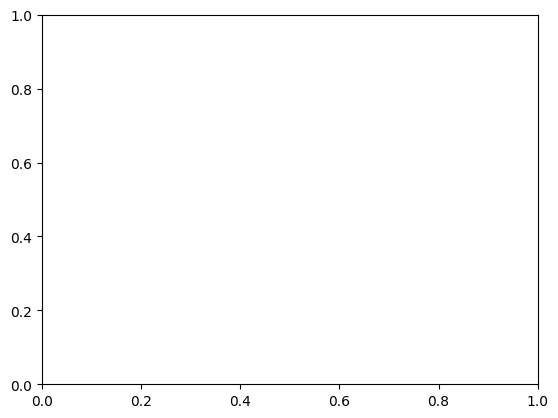

In [188]:
print(tsne.shape)
plt.scatter(tsne[:, 0], tsne[:, 1], cmap='hsv', s=50, c=indexed_dataSet, edgecolors=['black'], linewidth = 1)
plt.gca().set_aspect('equal', 'datalim')
plt.gcf().set_size_inches(20, 15)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
# cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
# cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
for i, txt in zip(tsne, embedding_labels):
    plt.annotate(txt, (i[0], i[1]), fontsize=3, rotation=45)
colorbar = plt.colorbar(boundaries=np.arange(len(np.unique(embedding_labels))+1)-0.5)
colorbar.set_ticks(range(len(np.unique(embedding_labels))))
colorbar.ax.set_yticklabels(np.unique(embedding_labels))
plt.title(f't-SNE on {face_recognition_model} embeddings', fontsize=24)
plt.xticks(np.linspace(-6, 6, 7))
plt.yticks(np.linspace(-6, 6, 7))
plt.tight_layout()
plt.savefig(f"t-sne_{face_recognition_model}_center_center.png", dpi=200)

In [145]:
result = DeepFace.verify(
  img1_path = "/tf/data/dataset_full/center/center/amzayakina/glasses.JPG",
  img2_path = "/tf/data/dataset_full/center/center/amzayakina/no_glasses.JPG",
  model_name = face_recognition_model,
)

In [146]:
print(result)

{'verified': True, 'distance': 0.21138388707827516, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 1621, 'y': 3302, 'w': 50, 'h': 50}, 'img2': {'x': 1630, 'y': 3301, 'w': 53, 'h': 53}}, 'time': 0.97}


То же, но на всех ракурсах

In [3]:
import os

from deepface import DeepFace

import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# face_recognition_model = "Facenet"
# face_recognition_model = "VGG-Face"
model_names = [
    "VGG-Face",
    "Facenet",
    "Facenet512",
    "OpenFace",
    "DeepFace",
    "DeepID",
    "ArcFace",
    "SFace",
    "GhostFaceNet"
]

vertical_folders = ["up", "center", "down"]
horizontal_folders = ["45_left", "center", "45_right"]

dataset_path = "/tf/data/dataset_clean/"
people_list = [person for person in os.listdir(os.path.join(dataset_path, "center/center")) if not person.startswith(".")]
print(people_list)
print(len(people_list))

['aabatashova', 'aamartynenko_9', 'aapardaev', 'aaraimova', 'aazheltov_1', 'adletunov', 'adpiskunov', 'aimilovanova', 'akklochkova', 'ameliseenko', 'amsirotkin', 'amzayakina', 'anguen', 'ankarabutova', 'appecherskih', 'arandarbua', 'archilingarov', 'arkhabibullina_3', 'asbaranova', 'aschinkov', 'assupolyarina', 'avkarpukhin_1', 'avpanarin', 'avpapina', 'avvorobev_5', 'ayuvasileva_1', 'baserebrov', 'dadmitriev', 'dashubin', 'datikhomirov', 'demirkin', 'deredin_1', 'didiulgerov', 'dkorolev', 'dmbobrova', 'drsmirnov', 'dvzaitseva', 'eabykova_6', 'eamilekhina', 'eelogvina', 'eggadzhiev', 'evdarkhanov', 'gaataev', 'imdolgov', 'imsalakhov', 'ipustenko', 'ischekanov', 'isulanova', 'kdfrolov', 'khtalbegov', 'kvnovikov', 'limiroshnichenko', 'madusov', 'mapivovarova', 'masadkovskaya', 'mdmilchakova', 'mdspitsyn', 'mvemelianenko', 'mvmoiseev', 'mvyakovlev_1', 'myumikheev', 'narybakovskiy', 'ndkubaev', 'nklimin', 'palmasizade', 'prybakov', 'rbadalian', 'rrminnegalieva', 'saslastnikov', 'svkozaev',

In [9]:
def plot_tsne(tsne, face_recognition_model, embedding_labels, suffix = ""):
    print(tsne.shape)
    lookupTable, indexed_dataSet = np.unique(embedding_labels, return_inverse=True)
    print(len(indexed_dataSet))
    print(np.unique(embedding_labels).shape)

    # Create a new figure
    fig, ax = plt.subplots()
    
    scatter = ax.scatter(tsne[:, 0], tsne[:, 1], cmap='hsv', s=100, c=indexed_dataSet, edgecolors=['black'], linewidth=1)
    ax.set_aspect('equal', 'datalim')
    fig.set_size_inches(20, 15)

    # Add colorbar
    colorbar = plt.colorbar(scatter, ax=ax, boundaries=np.arange(len(np.unique(embedding_labels))+1)-0.5)
    colorbar.set_ticks(np.arange(len(np.unique(embedding_labels))))
    colorbar.ax.set_yticklabels(np.unique(embedding_labels))
    
    # Annotate points
    for i, txt in zip(tsne, embedding_labels):
        ax.annotate(txt, (i[0], i[1]), fontsize=5, rotation=45)

    ax.set_title(f't-SNE on {face_recognition_model} embeddings', fontsize=24)
    ax.set_xticks(np.linspace(-6, 6, 7))
    ax.set_yticks(np.linspace(-6, 6, 7))

    plt.tight_layout()
    plt.savefig(f"t-sne_{face_recognition_model}_all_angles{suffix}.png", dpi=150)
    # plt.close(fig)  # Close the figure to free up memory and prevent display issues

Model: VGG-Face


100%|██████████| 78/78 [00:48<00:00,  1.62it/s]


embeddings array formed, it's shape is (909, 4096)
CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 17.4 µs
(909, 2)
909
(77,)
Model: Facenet


100%|██████████| 78/78 [01:01<00:00,  1.26it/s]


embeddings array formed, it's shape is (909, 128)
CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 15.5 µs
(909, 2)
909
(77,)
Model: Facenet512


100%|██████████| 78/78 [01:02<00:00,  1.25it/s]


embeddings array formed, it's shape is (909, 512)
CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 14.5 µs
(909, 2)
909
(77,)
Model: OpenFace


100%|██████████| 78/78 [01:24<00:00,  1.08s/it]


embeddings array formed, it's shape is (909, 128)
CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 18.8 µs
(909, 2)
909
(77,)
Model: DeepFace


  0%|          | 0/78 [00:00<?, ?it/s]


ValueError: DeepFace model requires LocallyConnected2D but it is no longer supported after tf 2.12 but you have 2.14. You need to downgrade your tf.

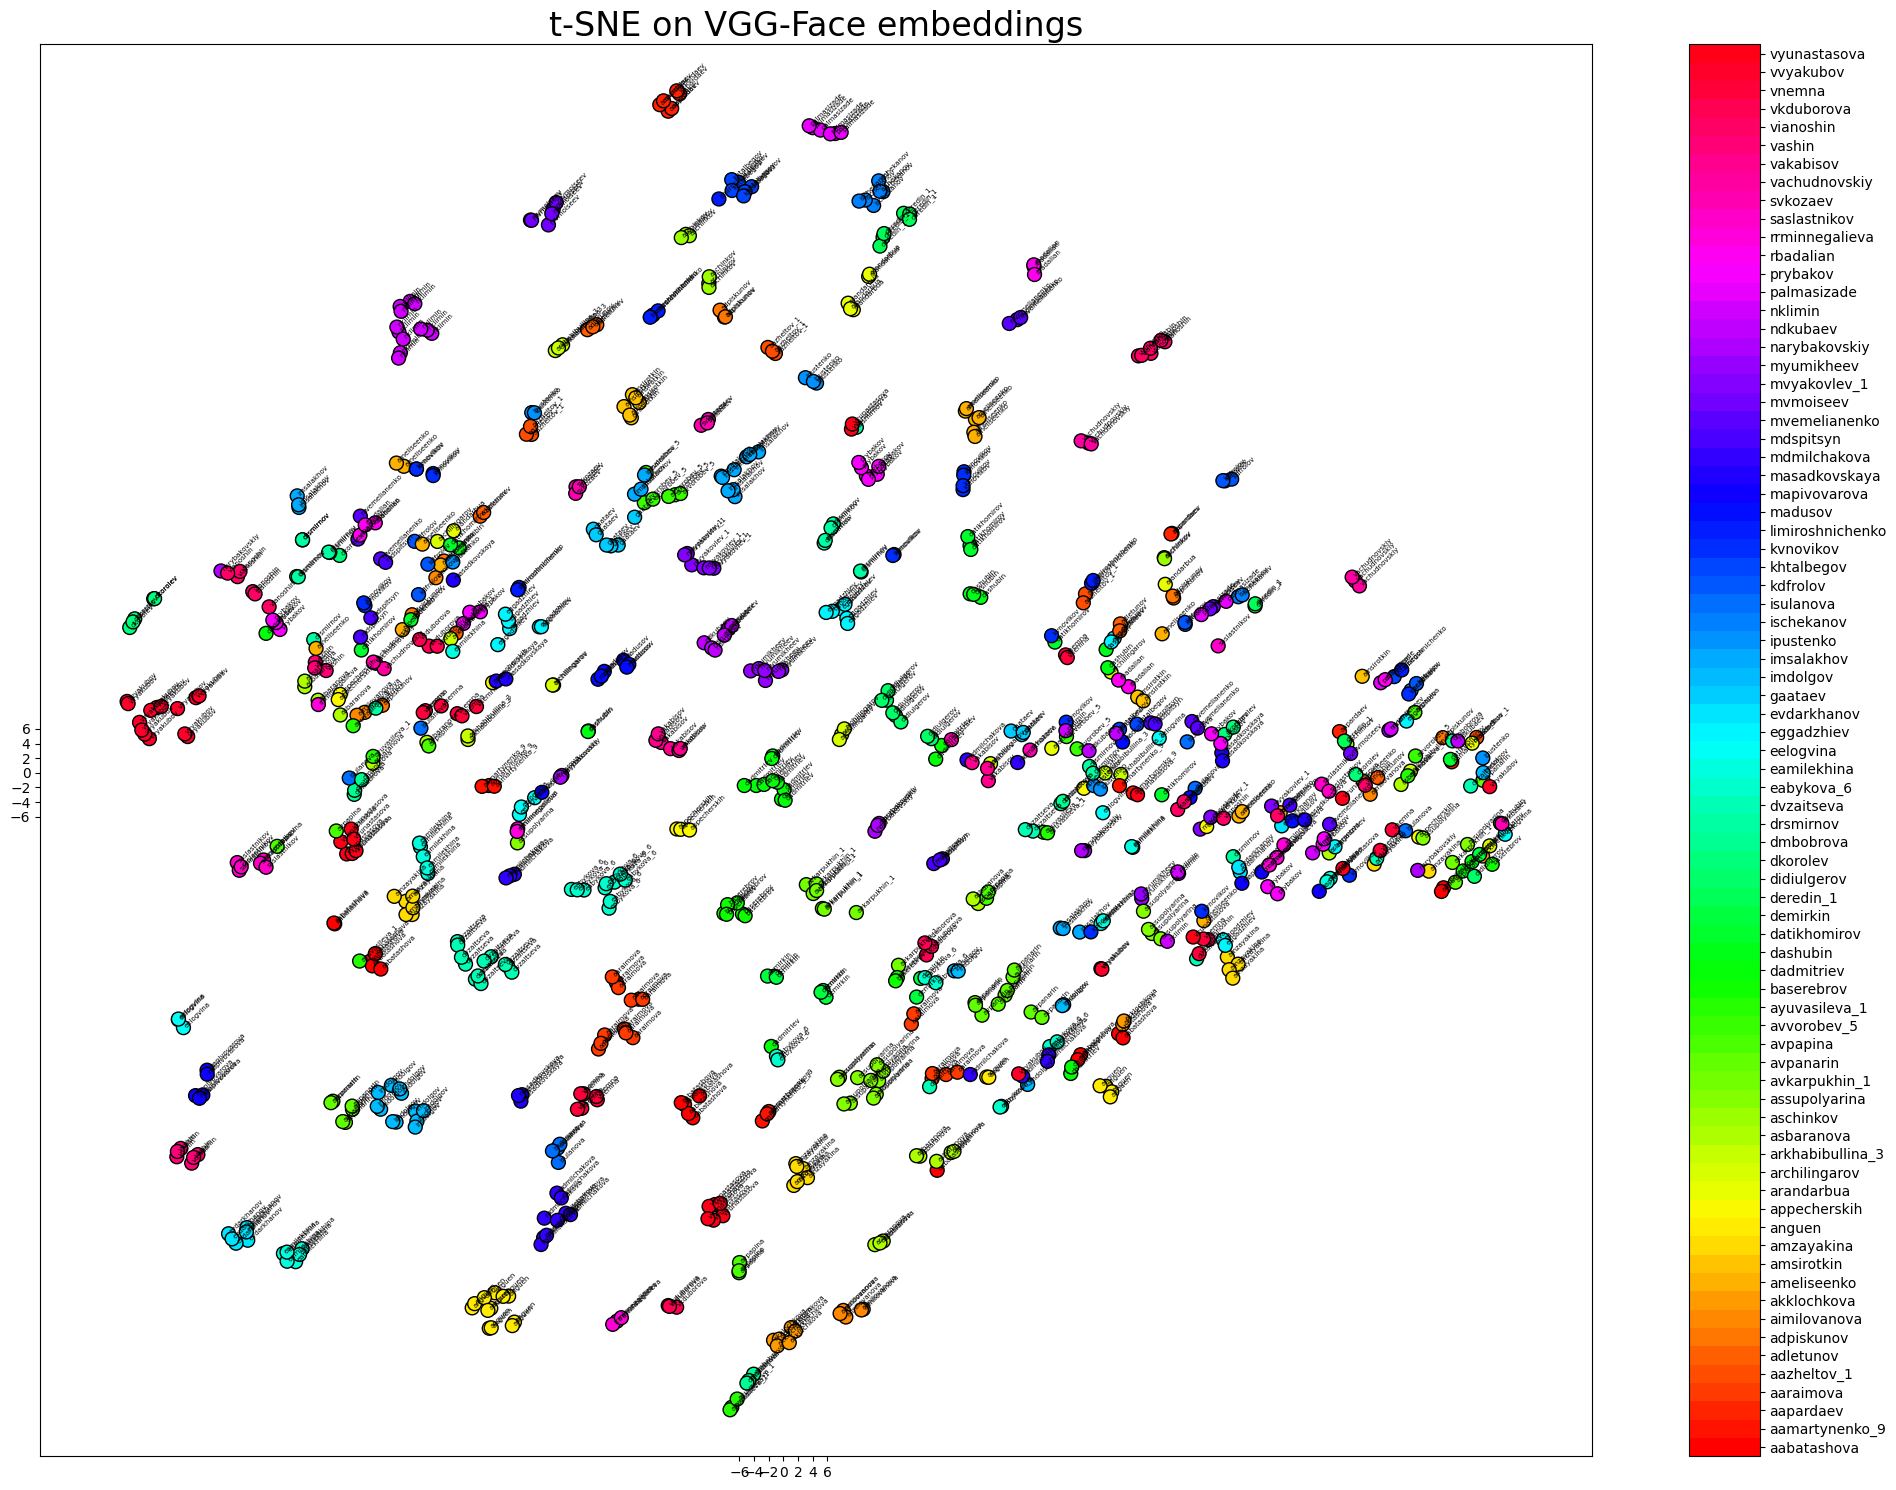

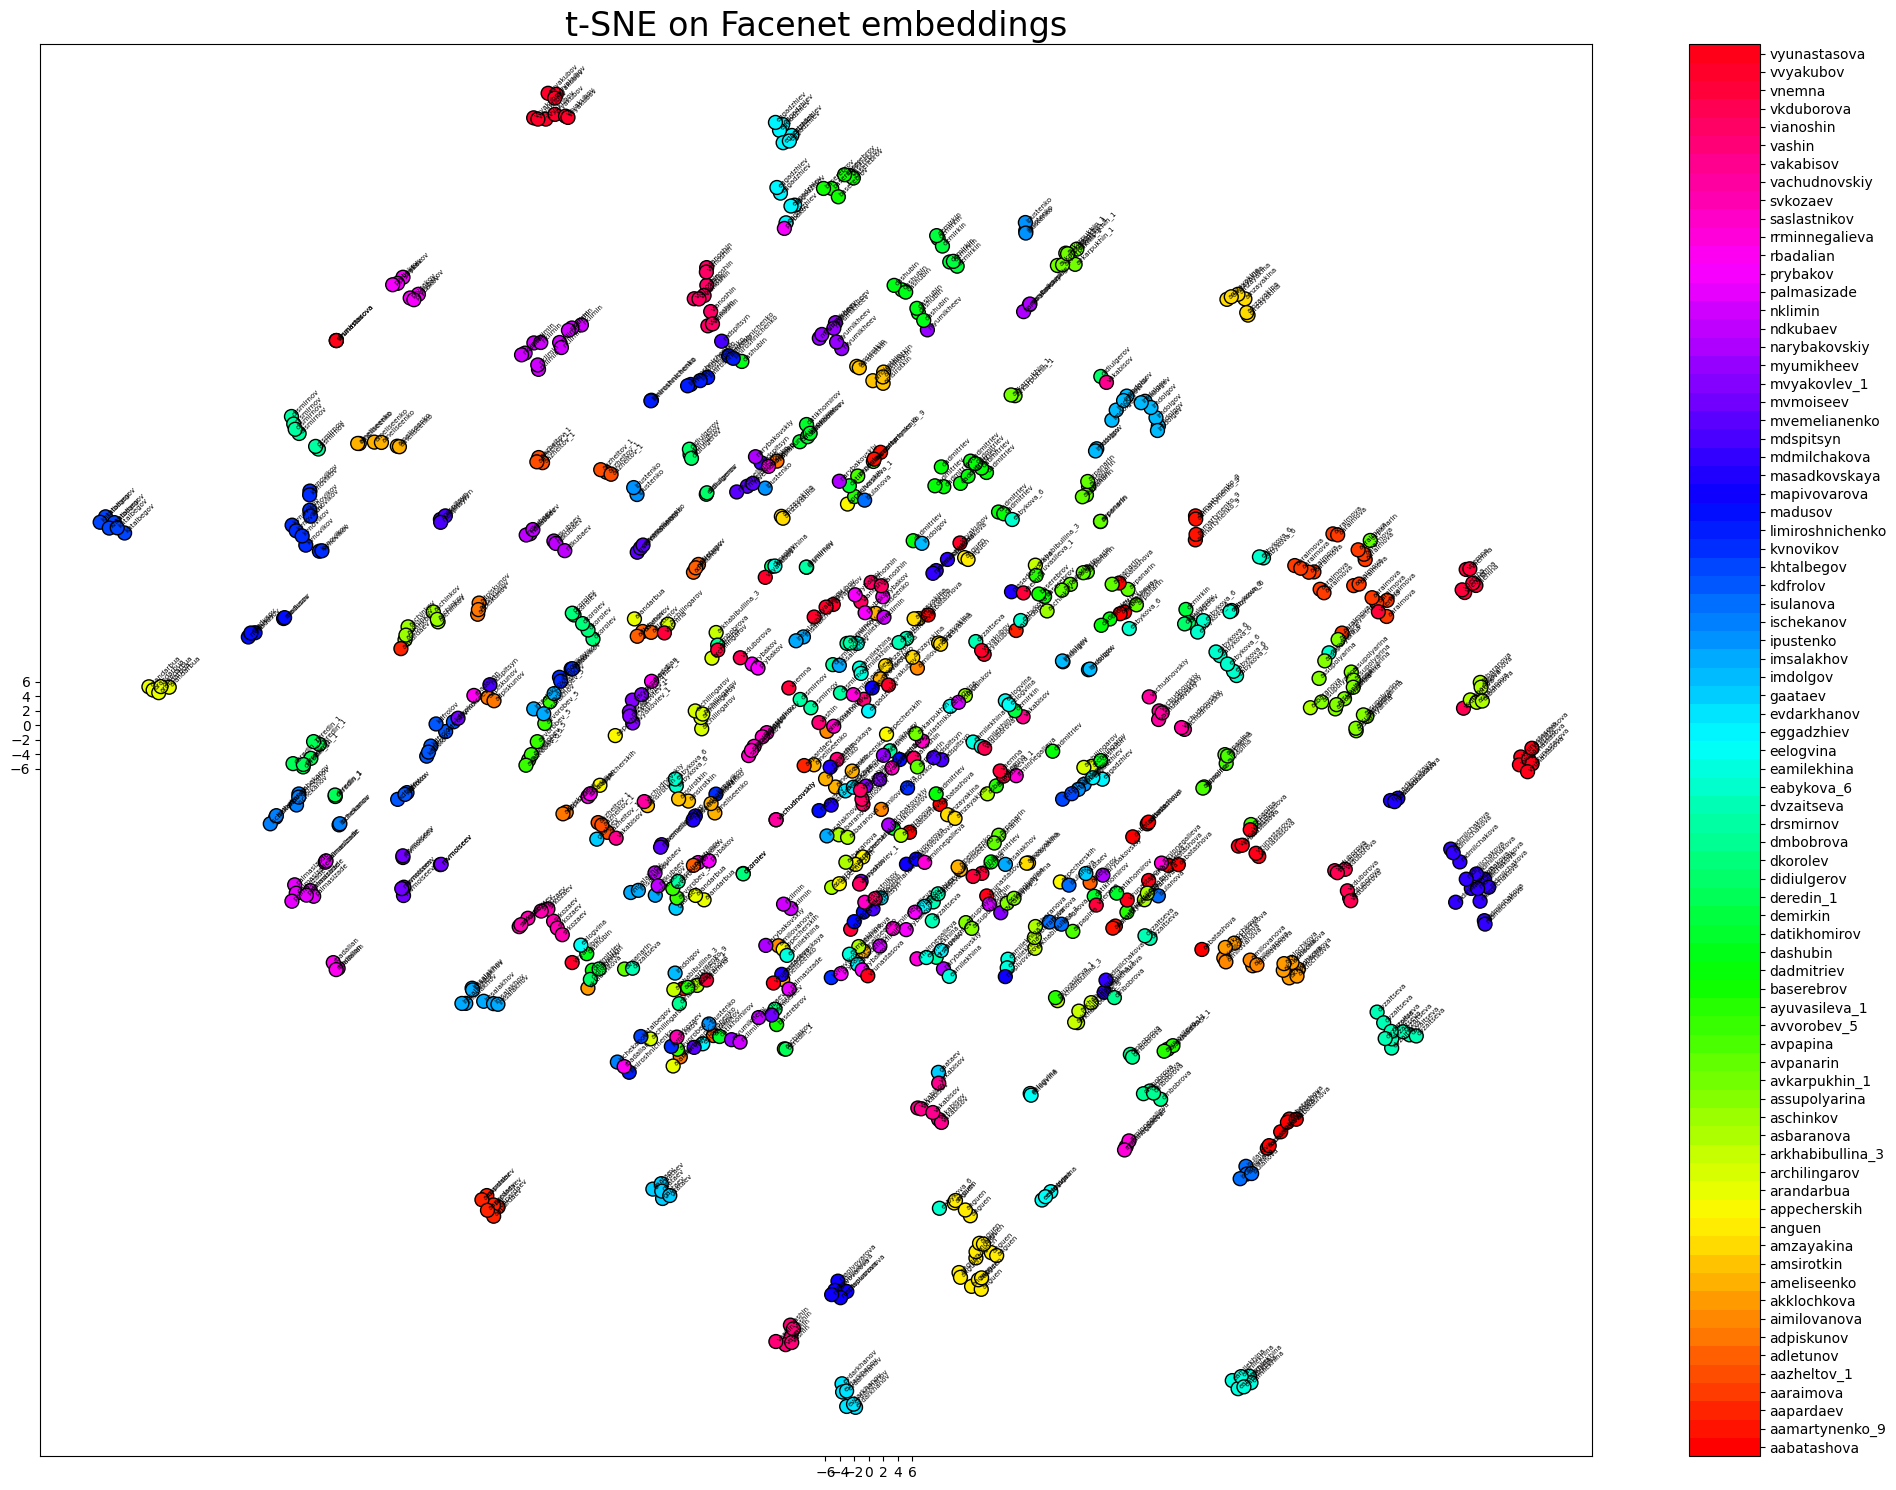

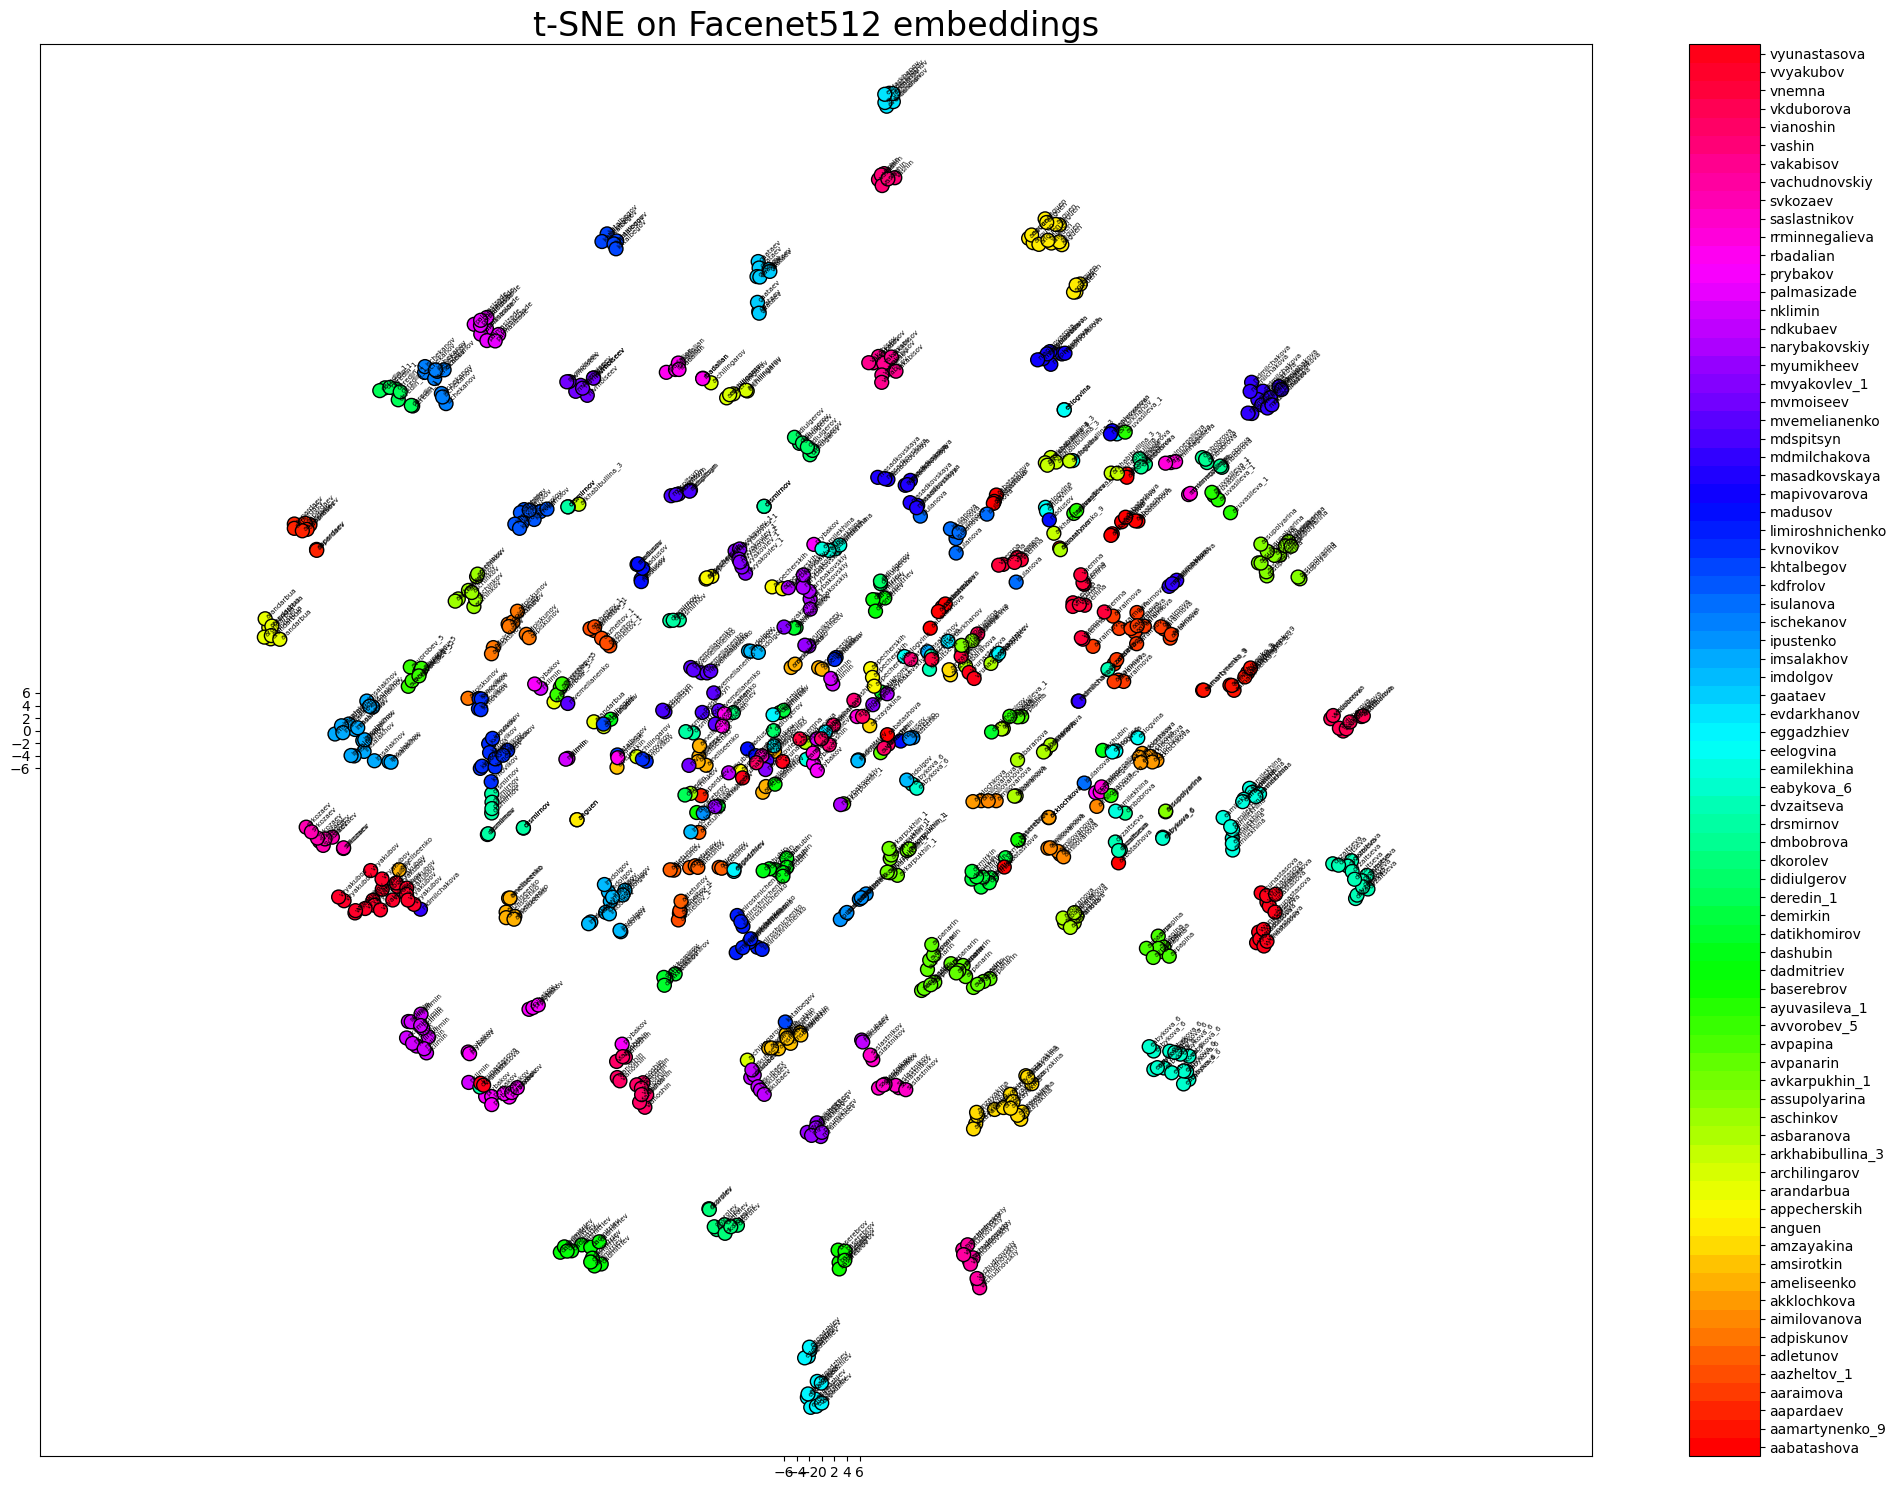

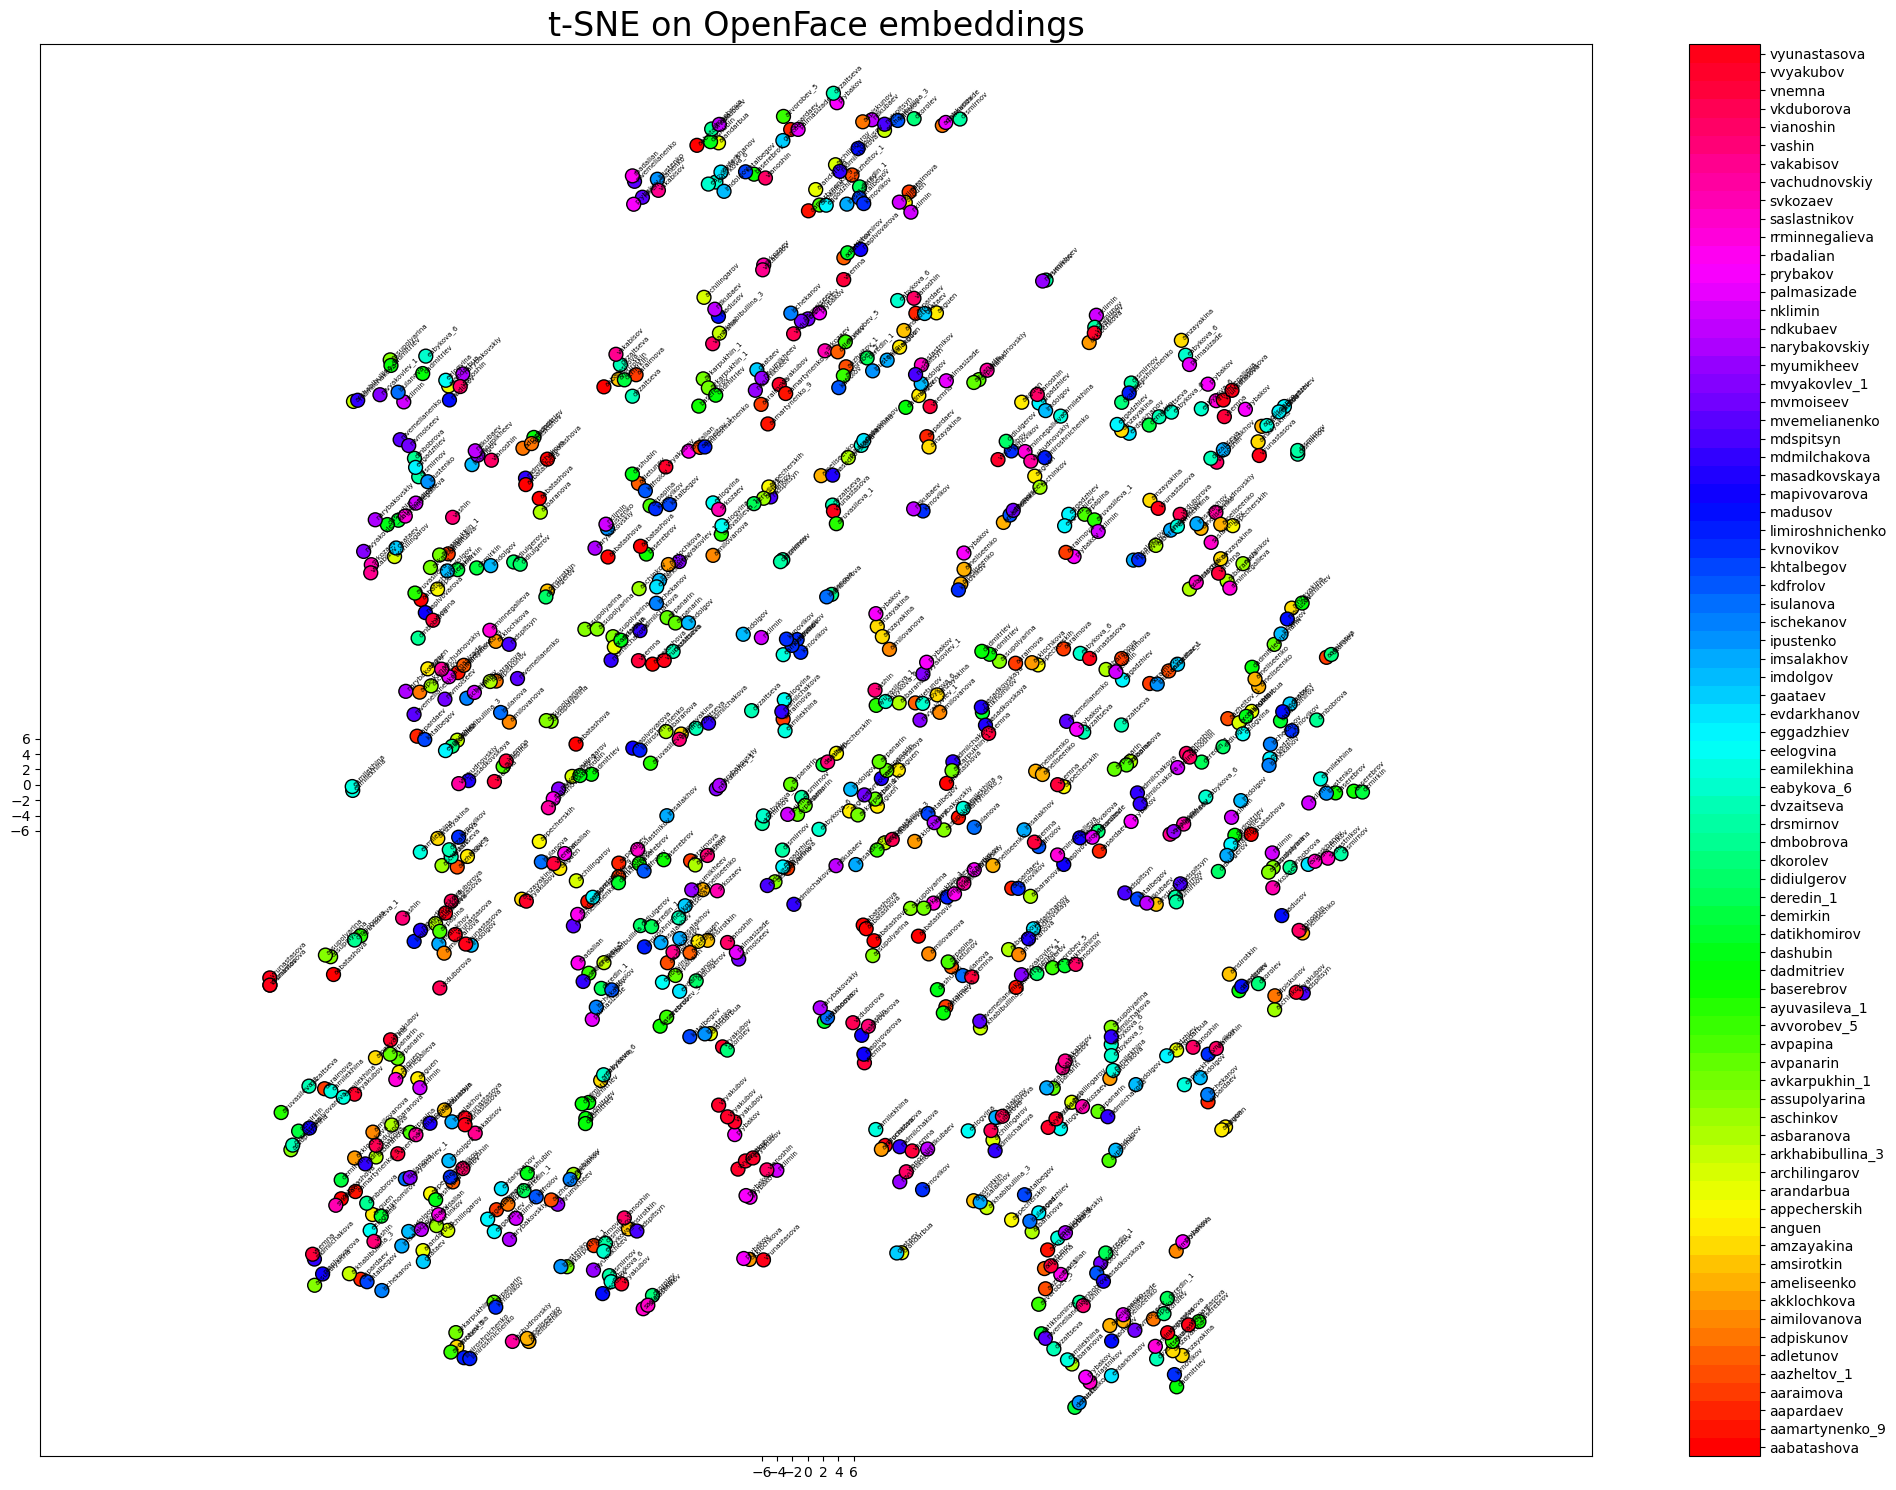

In [10]:
for face_recognition_model in model_names:
    face_embeddings = []
    embedding_labels = []
    print(f"Model: {face_recognition_model}")
    for vertical_folder_name in vertical_folders:
        vertical_folder_path = os.path.join(dataset_path, vertical_folder_name)
        os.makedirs(vertical_folder_path, exist_ok=True)
    
        for horizontal_folder_name in horizontal_folders:
            horizontal_folder_path = os.path.join(vertical_folder_path, horizontal_folder_name)
            os.makedirs(horizontal_folder_path, exist_ok=True)
            for person in tqdm(people_list):
                person_directory_path = os.path.join(horizontal_folder_path, person)
                for image in [image for image in os.listdir(person_directory_path) if image.endswith(('.JPG', '.jpg'))]:
                    # print(person)
                    image_path = os.path.join(person_directory_path,image)
                    
                    # embedding = np.random.rand(128)
                    # face_embeddings.append(embedding)
                    # embedding_labels.append(person)
                    
                    embedding = DeepFace.represent(
                        img_path = image_path, 
                        model_name = face_recognition_model,
                        detector_backend='retinaface',
                    )
                    face_embeddings.append(embedding[0]['embedding'])
                    embedding_labels.append(person)
                    # print(face_embeddings)
                    # print(embedding)
    
    face_embeddings = np.asarray(face_embeddings)
    print(f"embeddings array formed, it's shape is {face_embeddings.shape}")
    %time
    perplexity = 6
    n_iter = 2000
    tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=n_iter).fit_transform(face_embeddings)
    plot_tsne(tsne, face_recognition_model, embedding_labels, suffix=f"_{perplexity}_{n_iter}")

(792, 2)
792
(59,)


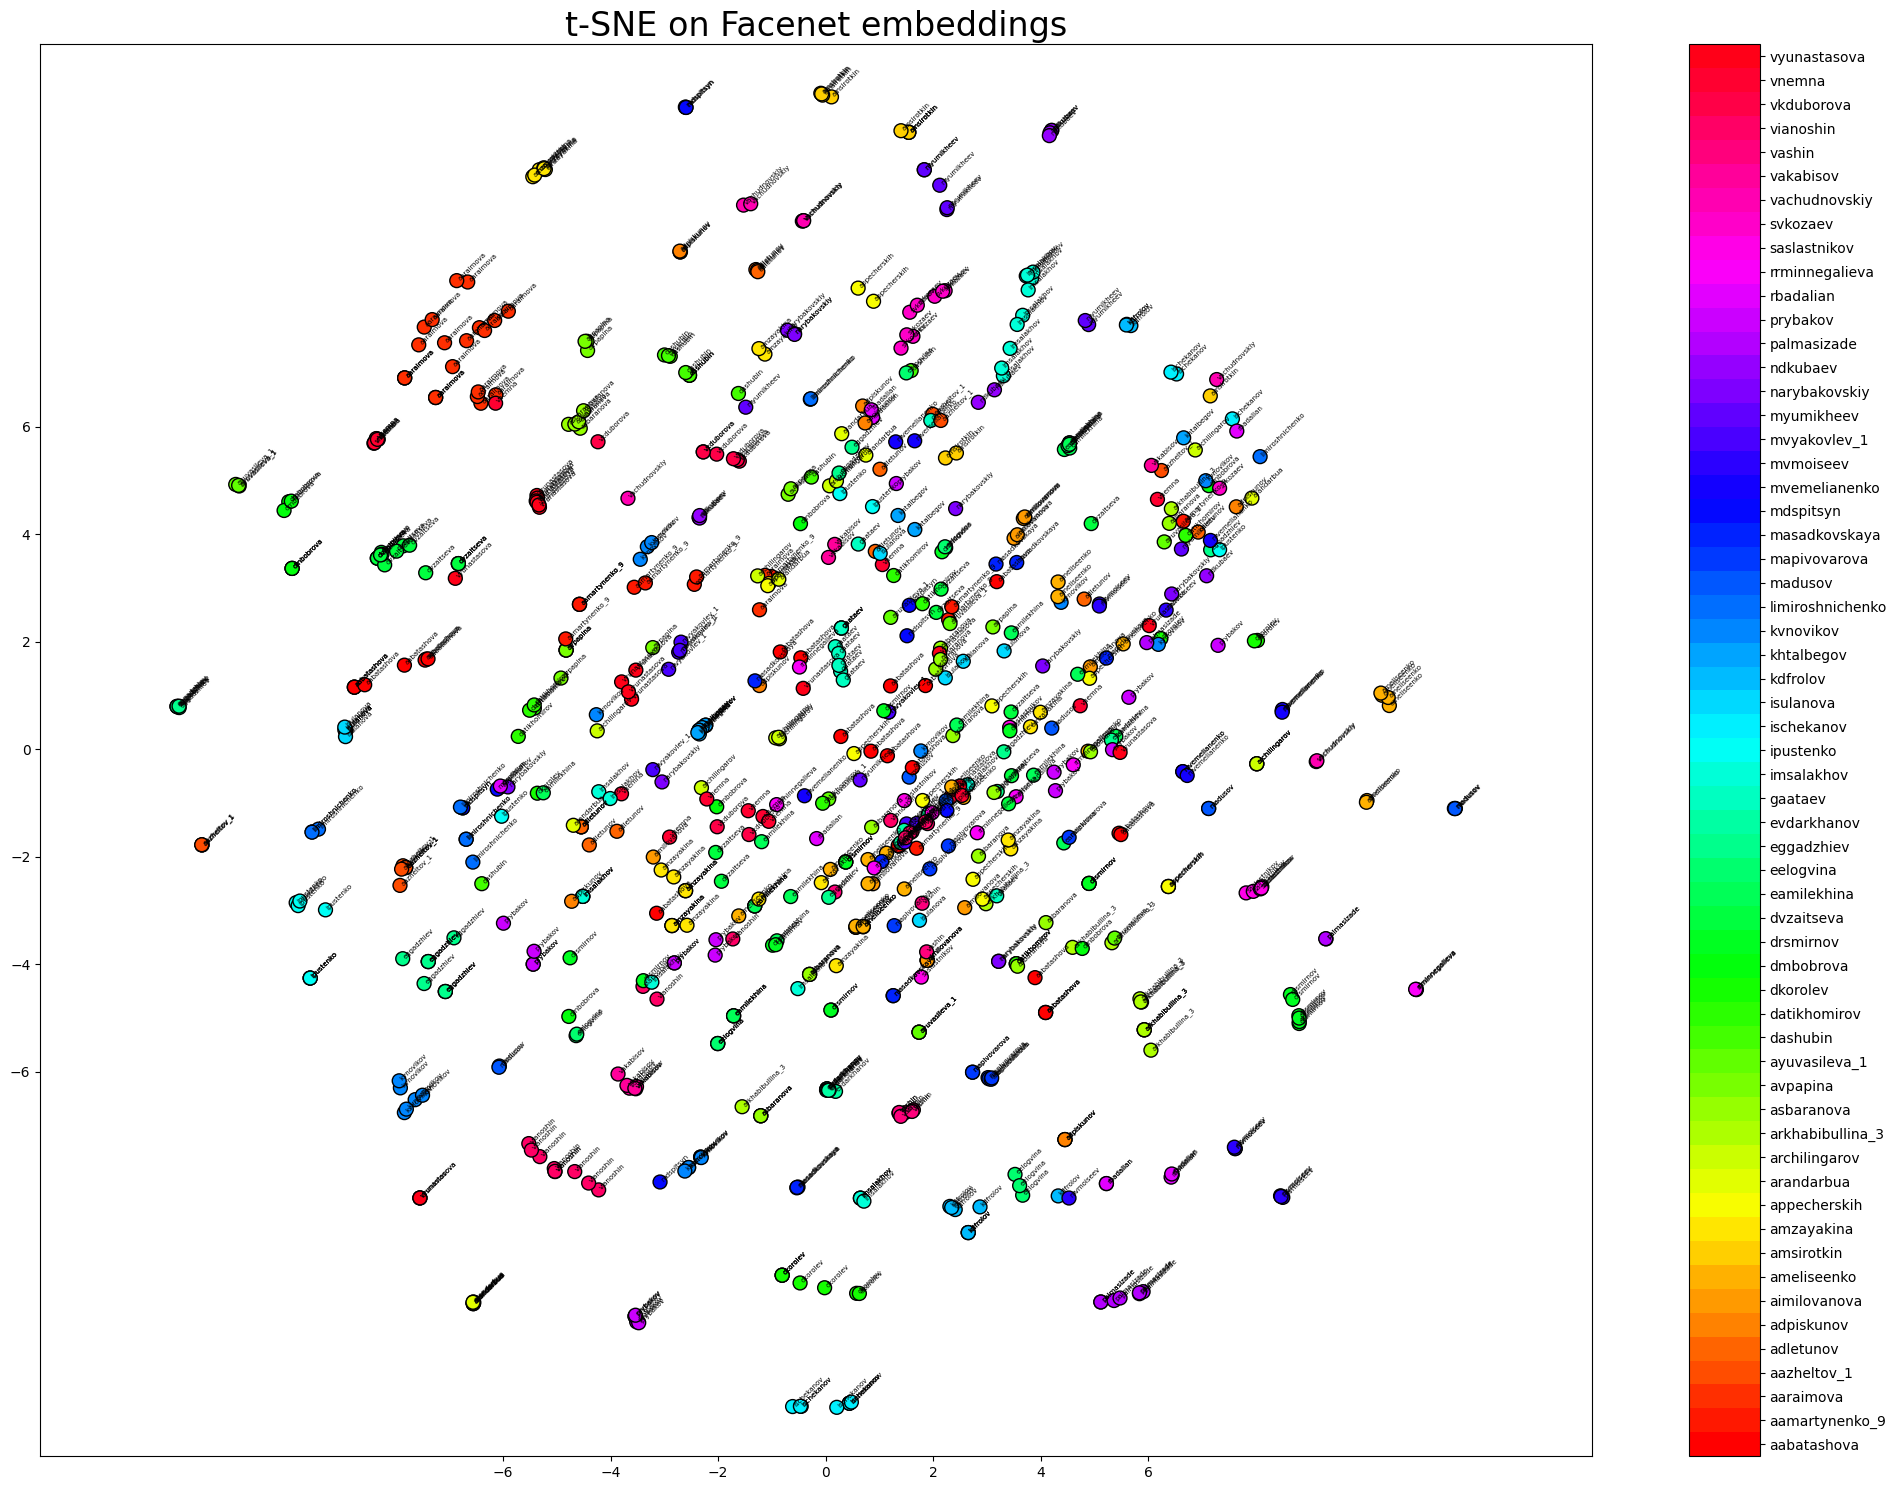

In [185]:
plot_tsne(tsne, face_recognition_model, embedding_labels)